<a href="https://colab.research.google.com/github/sungjindo/black_coal_price/blob/main/Week_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.Module

In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot #plotly offline mode 
init_notebook_mode(connected = True)
import plotly.graph_objs as go #plotly graphical object
%matplotlib notebook
%matplotlib inline

# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score, train_test_split   # validation  검증 라이브러리

import matplotlib.pyplot as plt
import matplotlib

import statsmodels.api as sm    # 통계분석 관련 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from fbprophet import Prophet


import warnings    # 경고문구 지우기
warnings.filterwarnings("ignore")

# xgboost라이브러리 추가
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier
from datetime import datetime

from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Mounted at /content/gdrive


#1.Data

In [36]:
df = pd.read_excel("/content/gdrive/My Drive/Black_coal/data/dataset/project_dataset.xlsx")
df = df.sort_values('date')
df = df.rename(columns ={'date':'ds'})
df['ds']= pd.to_datetime(df['ds'])

df = df.set_index('ds')
df = df[df.index < '2019-04-01']
df = df.resample('W-MON').mean() #월요일 기준으로 평균값 df

df = df.reset_index()
# df = df[['ds','Coal_price']]
df  

,ds,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,bdi,USD/AUD(호주),...,영국지수,독일지수,S&P500지수,항셍지수,나스닥지수,코스피지수,니케이225지수,유로스톡스50지수,호주지수,캐나다지수
0,2011-01-03,127.266667,168.866667,94.780000,9644.000000,91.436667,91.453333,61.070000,1773.000000,0.982650,...,5899.899902,6939.373372,1262.383341,23168.983073,2665.753418,2057.360026,10228.919922,2817.836670,4745.200195,13443.200195
1,2011-01-10,135.600000,173.442857,94.177143,9476.964286,88.771429,88.932857,56.531429,1558.571429,1.000303,...,5998.071289,6942.448521,1272.122855,23685.679129,2701.521380,2083.529994,10496.112723,2814.252825,4715.671387,13310.285575
2,2011-01-17,136.578571,177.857143,98.180000,9639.821429,91.504286,91.540000,55.690000,1446.714286,1.006029,...,6011.514369,7055.802874,1288.165702,24161.655971,2744.378627,2099.587123,10516.174247,2894.737130,4771.100098,13442.171177
3,2011-01-24,132.228571,178.500000,97.421429,9514.857143,89.471429,89.554286,55.398571,1384.428571,1.009414,...,5933.399902,7072.215681,1285.441424,24001.379464,2711.667201,2087.249930,10383.151228,2955.362898,4781.885812,13350.414062
4,2011-01-31,129.350000,179.371429,98.545714,9497.071429,88.481429,88.532857,54.164286,1175.714286,1.007243,...,5908.442871,7103.974191,1286.069999,23672.869699,2710.682826,2100.782889,10380.559989,2961.618513,4785.757045,13428.628348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2019-03-04,96.414286,86.551429,65.501429,6458.821429,56.235714,56.052857,43.587143,659.857143,1.402134,...,7112.500140,11563.065569,2796.378523,28794.111328,7571.422782,2204.829973,21574.452567,3303.395787,6177.600028,16054.885603
427,2019-03-11,96.328571,85.577143,65.992857,6426.357143,56.348571,56.117143,42.027143,653.714286,1.419207,...,7140.071359,11520.452846,2760.362863,28566.744141,7469.460031,2153.005720,21282.981585,3302.278599,6214.342773,16047.128627
428,2019-03-18,94.214286,85.848571,67.210000,6435.142857,58.341429,58.272857,38.398571,698.428571,1.413800,...,7211.414272,11628.311523,2815.899972,29003.642578,7663.631348,2167.012870,21431.142578,3359.372872,6175.957241,16149.557338
429,2019-03-25,93.421429,85.825714,67.467143,6385.892857,59.254286,59.031429,36.681429,696.428571,1.407571,...,7252.957171,11483.059989,2816.024275,29103.176897,7693.918597,2177.901437,21520.545480,3338.064244,6175.585798,16133.442662


In [3]:
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

#2.Graph


## XGboost - 19.01~03 (xfeature)

In [38]:
import pandas as pd
import numpy as np
import re
from datetime import date, datetime
import datetime
from google.colab import drive
drive.mount('/content/gdrive/')

import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgbm
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [39]:
df = pd.read_excel("/content/gdrive/My Drive/Black_coal/data/dataset/project_dataset.xlsx")
df = df.set_index('date')
df = df.resample('W-MON').mean() #월요일 기준으로 평균값 df
df = df.reset_index()

In [6]:
period = 90

day_freq = 'D' #(day_freq를 'D'로하면 모든 날짜, 'B'로하면 주말 제외 주중만)

df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df['date'])
df = df.drop(['date'],axis = 1)
_ = pd.DataFrame({'weekly': 0}, index = pd.date_range(df.head(1).index[0], df.tail(1).index[0], freq=day_freq))
_ = pd.concat([df, _], axis = 1)
_
_ = _.dropna()
df = _.drop('weekly',axis = 1)
df

,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,bdi,USD/AUD(호주),USD/CAD(캐나다),...,영국지수,독일지수,S&P500지수,항셍지수,나스닥지수,코스피지수,니케이225지수,유로스톡스50지수,호주지수,캐나다지수
2011-01-03,127.266667,168.866667,94.780000,9644.000000,91.436667,91.453333,61.070000,1773.000000,0.982650,0.997300,...,5899.899902,6939.373372,1262.383341,23168.983073,2665.753418,2057.360026,10228.919922,2817.836670,4745.200195,13443.200195
2011-01-10,135.600000,173.442857,94.177143,9476.964286,88.771429,88.932857,56.531429,1558.571429,1.000303,0.995741,...,5998.071289,6942.448521,1272.122855,23685.679129,2701.521380,2083.529994,10496.112723,2814.252825,4715.671387,13310.285575
2011-01-17,136.578571,177.857143,98.180000,9639.821429,91.504286,91.540000,55.690000,1446.714286,1.006029,0.988957,...,6011.514369,7055.802874,1288.165702,24161.655971,2744.378627,2099.587123,10516.174247,2894.737130,4771.100098,13442.171177
2011-01-24,132.228571,178.500000,97.421429,9514.857143,89.471429,89.554286,55.398571,1384.428571,1.009414,0.994096,...,5933.399902,7072.215681,1285.441424,24001.379464,2711.667201,2087.249930,10383.151228,2955.362898,4781.885812,13350.414062
2011-01-31,129.350000,179.371429,98.545714,9497.071429,88.481429,88.532857,54.164286,1175.714286,1.007243,0.996093,...,5908.442871,7103.974191,1286.069999,23672.869699,2710.682826,2100.782889,10380.559989,2961.618513,4785.757045,13428.628348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-07,73.435714,138.565714,48.702857,7719.071429,45.715714,45.620000,42.557143,1193.428571,1.348660,1.288794,...,6506.342913,13302.325753,3683.928606,26691.909877,12427.757394,2706.594238,26742.721261,3530.221470,6624.471470,17456.928571
2020-12-14,77.414286,149.668571,49.735714,7766.928571,46.371429,46.581429,45.265714,1181.714286,1.336260,1.277297,...,6556.442662,13211.505720,3668.720006,26446.445312,12414.454241,2753.605713,26675.893973,3505.525774,6669.614397,17546.614676
2020-12-21,79.728571,152.144286,51.575714,7905.714286,48.405714,48.461429,47.062857,1309.714286,1.318333,1.274436,...,6519.885742,13533.418527,3705.917097,26449.776786,12718.205497,2770.604248,26750.928850,3530.181431,6680.514300,17547.357143
2020-12-28,80.657143,154.917143,51.042857,7789.642857,47.954286,47.945714,51.122857,1360.285714,1.317315,1.285374,...,6488.942871,13592.078962,3703.552909,26331.888951,12813.910296,2789.934361,26636.198103,3538.457136,6652.385603,17609.371652


In [7]:
# df['next_coal_price'] = df['Coal_price'].shift(-1)
df = df.dropna()
#df = df.drop(['Coal_price'],axis = 1)
df= df[['Coal_price', 'iron', 'Brent_fut', 'WTI_fut', 'WTI', 
        'LNG_fut', 'bdi', 'USD/AUD(호주)', 'USD/CAD(캐나다)', 'USD/COP(콜롬비아)', 'USD/IDR(인도네시아)', 
        'USD/RUB(러시아)', 'USD/ZAR(자메이카)', 'US 달러지수', '상하이종합지수', '인도지수', '브라질지수', 
        '다우존스지수', '프랑스지수', '영국지수', '독일지수', '호주지수', '캐나다지수', 
        'S&P500지수', '항셍지수', '나스닥지수', '코스피지수', '니케이225지수', '유로스톡스50지수']]
df.columns = ['Coal', 'Iron', 'Brent_fut', 'WTI_fut', 'WTI', 
              'LNG_fut', 'BDI', 'AUD_dollar', 'CAD_dollor', 'COP_dollor', 'IDR_dollor', 
              'RUB_dollor', 'ZAR_dollor', 'DXY' , 'SHA', 'BSE', 'BVSP', 
              'DJI', 'CAC', 'FTSE', 'DAX', 'ASX', 'TSX', 
              'S&P500', 'HSI', 'IXIC', 'KOSPI', 'Nikkei225', 'SX5E']
df.tail()

,Coal,Iron,Brent_fut,WTI_fut,WTI,LNG_fut,BDI,AUD_dollar,CAD_dollor,COP_dollor,...,FTSE,DAX,ASX,TSX,S&P500,HSI,IXIC,KOSPI,Nikkei225,SX5E
2020-12-07,73.435714,138.565714,48.702857,45.715714,45.620000,42.557143,1193.428571,1.348660,1.288794,3503.681431,...,6506.342913,13302.325753,6624.471470,17456.928571,3683.928606,26691.909877,12427.757394,2706.594238,26742.721261,3530.221470
2020-12-14,77.414286,149.668571,49.735714,46.371429,46.581429,45.265714,1181.714286,1.336260,1.277297,3449.171422,...,6556.442662,13211.505720,6669.614397,17546.614676,3668.720006,26446.445312,12414.454241,2753.605713,26675.893973,3505.525774
2020-12-21,79.728571,152.144286,51.575714,48.405714,48.461429,47.062857,1309.714286,1.318333,1.274436,3416.837193,...,6519.885742,13533.418527,6680.514300,17547.357143,3705.917097,26449.776786,12718.205497,2770.604248,26750.928850,3530.181431
2020-12-28,80.657143,154.917143,51.042857,47.954286,47.945714,51.122857,1360.285714,1.317315,1.285374,3487.678571,...,6488.942871,13592.078962,6652.385603,17609.371652,3703.552909,26331.888951,12813.910296,2789.934361,26636.198103,3538.457136
2021-01-04,82.100000,155.703333,51.410000,48.306667,48.143333,55.910000,1366.000000,1.310766,1.280427,3463.750000,...,6539.666667,13732.980143,6656.599935,17507.533854,3738.383382,26982.243490,12869.500000,2855.816650,27485.496745,3574.850098


In [8]:
index = df.index
col_names = df.columns

In [9]:
train_end_time = datetime.date(2018, 12, 31)
test_end_time = train_end_time+ datetime.timedelta(period)
train_end_time = f'{train_end_time.year}-{train_end_time.month}-{train_end_time.day}'
test_end_time = f'{test_end_time.year}-{test_end_time.month}-{test_end_time.day}'
test_end_time = pd.date_range(train_end_time,test_end_time, freq=day_freq)

df = df.loc[df.index <= test_end_time[-1]].copy()

In [10]:
df

,Coal,Iron,Brent_fut,WTI_fut,WTI,LNG_fut,BDI,AUD_dollar,CAD_dollor,COP_dollor,...,FTSE,DAX,ASX,TSX,S&P500,HSI,IXIC,KOSPI,Nikkei225,SX5E
2011-01-03,127.266667,168.866667,94.780000,91.436667,91.453333,61.070000,1773.000000,0.982650,0.997300,1907.333333,...,5899.899902,6939.373372,4745.200195,13443.200195,1262.383341,23168.983073,2665.753418,2057.360026,10228.919922,2817.836670
2011-01-10,135.600000,173.442857,94.177143,88.771429,88.932857,56.531429,1558.571429,1.000303,0.995741,1875.142857,...,5998.071289,6942.448521,4715.671387,13310.285575,1272.122855,23685.679129,2701.521380,2083.529994,10496.112723,2814.252825
2011-01-17,136.578571,177.857143,98.180000,91.504286,91.540000,55.690000,1446.714286,1.006029,0.988957,1851.471418,...,6011.514369,7055.802874,4771.100098,13442.171177,1288.165702,24161.655971,2744.378627,2099.587123,10516.174247,2894.737130
2011-01-24,132.228571,178.500000,97.421429,89.471429,89.554286,55.398571,1384.428571,1.009414,0.994096,1820.064314,...,5933.399902,7072.215681,4781.885812,13350.414062,1285.441424,24001.379464,2711.667201,2087.249930,10383.151228,2955.362898
2011-01-31,129.350000,179.371429,98.545714,88.481429,88.532857,54.164286,1175.714286,1.007243,0.996093,1833.985700,...,5908.442871,7103.974191,4785.757045,13428.628348,1286.069999,23672.869699,2710.682826,2100.782889,10380.559989,2961.618513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-25,94.921429,88.205714,66.674286,56.747143,56.411429,45.455714,632.285714,1.401286,1.320287,3113.957136,...,7184.957241,11430.421456,6147.257045,16009.357282,2787.637102,28682.900670,7510.375698,2226.872838,21429.018694,3264.894287
2019-03-04,96.414286,86.551429,65.501429,56.235714,56.052857,43.587143,659.857143,1.402134,1.318124,3082.800014,...,7112.500140,11563.065569,6177.600028,16054.885603,2796.378523,28794.111328,7571.422782,2204.829973,21574.452567,3303.395787
2019-03-11,96.328571,85.577143,65.992857,56.348571,56.117143,42.027143,653.714286,1.419207,1.340861,3104.057164,...,7140.071359,11520.452846,6214.342773,16047.128627,2760.362863,28566.744141,7469.460031,2153.005720,21282.981585,3302.278599
2019-03-18,94.214286,85.848571,67.210000,58.341429,58.272857,38.398571,698.428571,1.413800,1.333739,3144.000000,...,7211.414272,11628.311523,6175.957241,16149.557338,2815.899972,29003.642578,7663.631348,2167.012870,21431.142578,3359.372872


In [11]:
test_end_time

DatetimeIndex(['2018-12-31', '2019-01-01', '2019-01-02', '2019-01-03',
               '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-12', '2019-01-13', '2019-01-14', '2019-01-15',
               '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-19',
               '2019-01-20', '2019-01-21', '2019-01-22', '2019-01-23',
               '2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27',
               '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31',
               '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
               '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
               '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12',
               '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-16',
               '2019-02-17', '2019-02-18', '2019-02-19', '2019-02-20',
               '2019-02-21', '2019-02-22', '2019-02-23', '2019-02-24',
      

In [12]:
train_end_time

'2018-12-31'

In [13]:
test_end_time

DatetimeIndex(['2018-12-31', '2019-01-01', '2019-01-02', '2019-01-03',
               '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-12', '2019-01-13', '2019-01-14', '2019-01-15',
               '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-19',
               '2019-01-20', '2019-01-21', '2019-01-22', '2019-01-23',
               '2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27',
               '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31',
               '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
               '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
               '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12',
               '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-16',
               '2019-02-17', '2019-02-18', '2019-02-19', '2019-02-20',
               '2019-02-21', '2019-02-22', '2019-02-23', '2019-02-24',
      

In [14]:
def create_features(df, col_name):
    X = df[col_name].drop(df.tail(1).index)
    y = df[col_name].shift(-1).drop(df.tail(1).index).rename("shift")
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    return X, y

In [15]:

df[[ 'Coal']]

,Coal
2011-01-03,127.266667
2011-01-10,135.600000
2011-01-17,136.578571
2011-01-24,132.228571
2011-01-31,129.350000
...,...
2019-02-25,94.921429
2019-03-04,96.414286
2019-03-11,96.328571
2019-03-18,94.214286


In [16]:


# params = {'objective': 'regression', 
#           'num_leaves': 5, 
#           'learning_rate': 0.1, 
#           'max_depth': 10,  
#           #'max_bin': 55, 
#           #'bagging_fraction': 0.8, 
#           #'bagging_freq': 5,
#           #'feature_fraction': 0.8, 
#           #'feature_fraction_seed': 9,
#           #'bagging_seed': 9, 
#           #'min_data_in_leaf': 6, 
#           #'min_sum_hessian_in_leaf': 11
#           }

In [17]:

final_df = df[[ 'Coal']]
true_df = pd.DataFrame()
for k in range(2,len(col_names)):
  df_X, df_y = create_features(df, col_names[k])
  df_y_rate = pd.DataFrame({"y_rate" : (df_y['shift']-df_X[col_names[k]])}, index = df_y.index)
  test_split_date = '2018-12-31'
  #val_split_date = '2017-12-31'
  
  train_X = df_X.loc[df_X.index < test_split_date].copy()
  #val_X = train_X.loc[train_X.index > val_split_date].copy()
  #train_X = train_X.loc[train_X.index <= val_split_date].copy()
  test_X = df_X.loc[df_X.index >= test_split_date].copy()

  train_y_rate = df_y_rate.loc[df_y_rate.index < test_split_date].copy()
  #val_y_rate = train_y_rate.loc[train_y_rate.index > val_split_date].copy()
  #train_y_rate = train_y_rate.loc[train_y_rate.index <= val_split_date].copy()
  test_y_rate = df_y_rate.loc[df_y_rate.index >= test_split_date].copy()

  train_y = df_y.loc[df_y.index < test_split_date].copy()
  test_y = df_y.loc[df_y.index >= test_split_date].copy()

  # split_date = '2018-12-31'
  # train_X = df_X.loc[df_X.index < split_date].copy()
  # test_X = df_X.loc[df_X.index >= split_date].copy()
  # train_y_rate = df_y_rate.loc[df_y_rate.index < split_date].copy()
  # test_y_rate = df_y_rate.loc[df_y_rate.index >= split_date].copy()
  # train_y = df_y.loc[df_y.index < split_date].copy()
  # test_y = df_y.loc[df_y.index >= split_date].copy()




  reg = xgb.XGBRegressor(num_round = 200, learning_rate=0.6,max_depth=1,n_estimators=90)
  reg.fit(train_X, train_y_rate,
          #eval_set=[(train_X, train_y_rate), (train_X, train_y_rate)],
          #early_stopping_rounds=100,
          verbose=False)
  

  df_y_pred = test_X.head(1)
  for i in range(len(test_end_time)):
    y_pred = reg.predict(df_y_pred.tail(1))
    y_pred = y_pred+df_y_pred[col_names[k]].tail(1)
    _ = df_y_pred.tail(1).index+datetime.timedelta(days=1)
    _ = pd.date_range(_[0],periods = 1, freq = day_freq)
    frame = pd.DataFrame({col_names[k]:y_pred[0]},index = _)
    frame
    df_y_pred = df_y_pred.append(frame)
    _ = pd.concat([train_X, df_y_pred])
  final_df = pd.concat([final_df, _], axis=1)
  true_df = pd.concat([true_df, test_X], axis=1)

[04:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

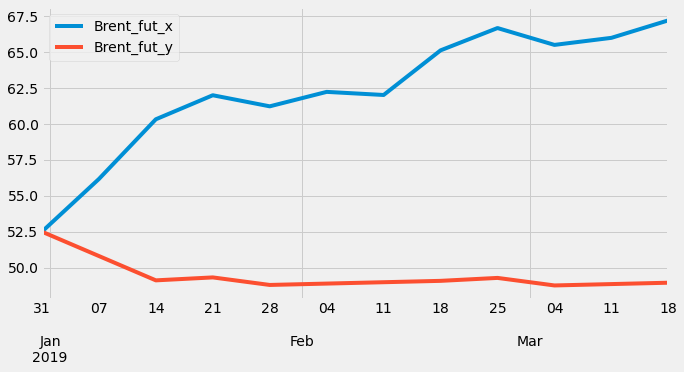

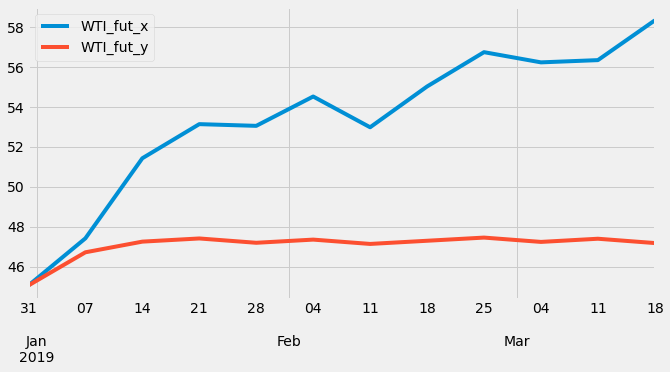

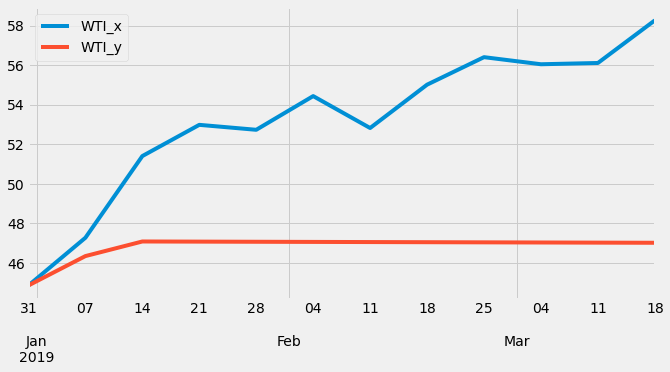

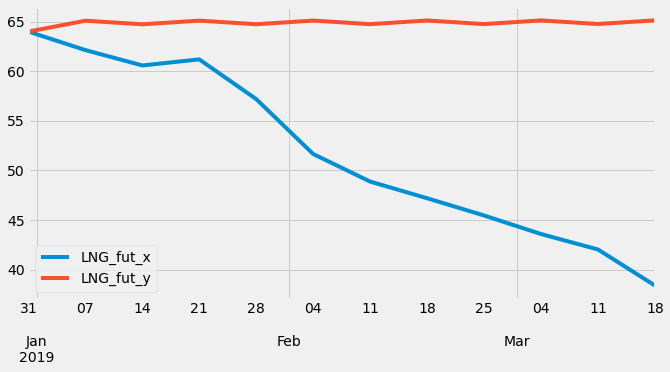

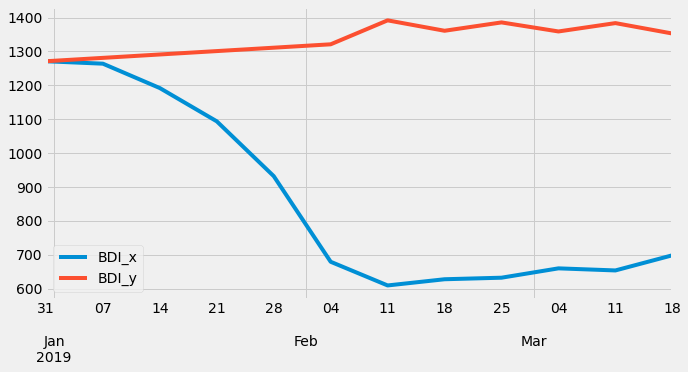

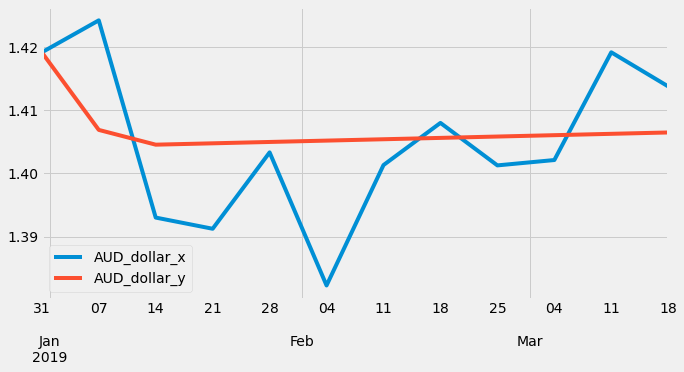

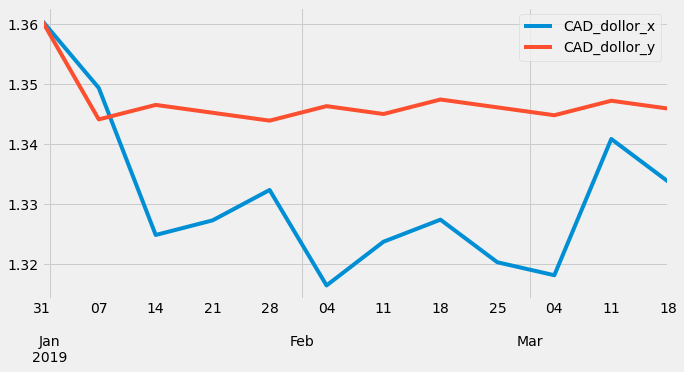

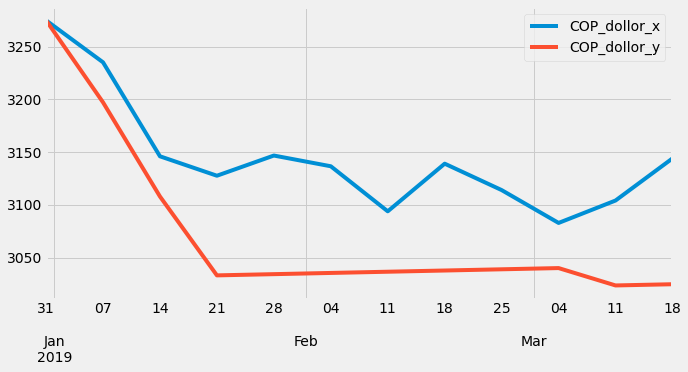

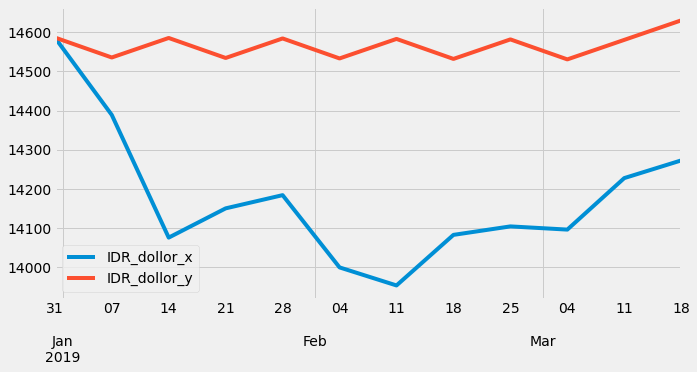

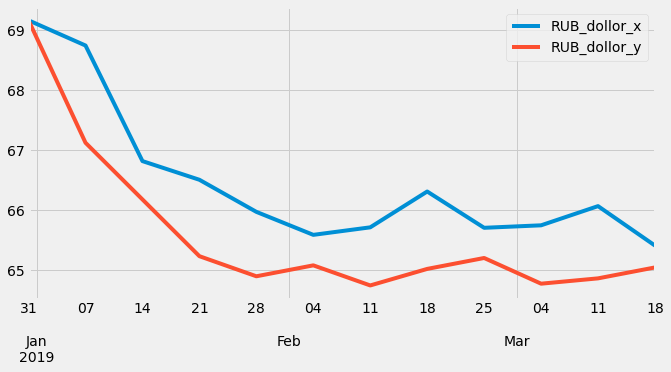

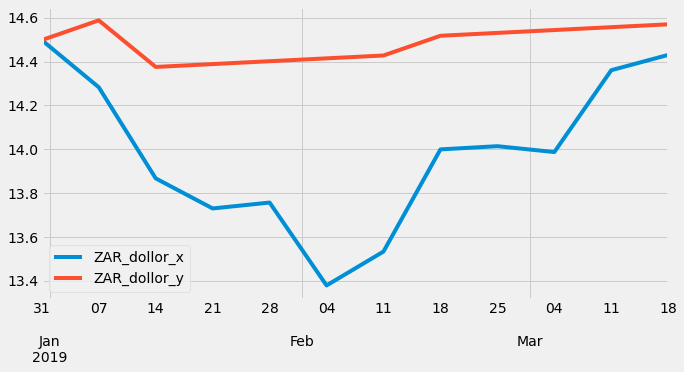

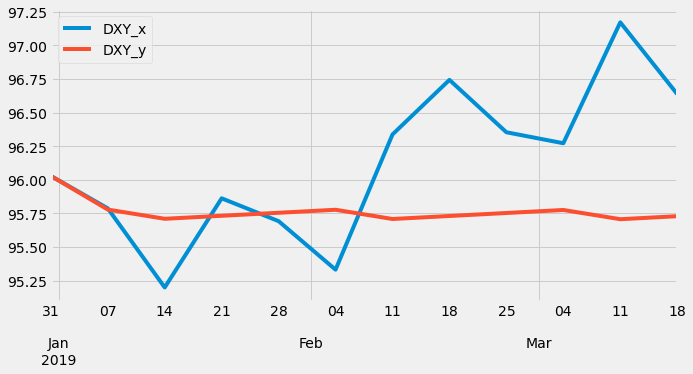

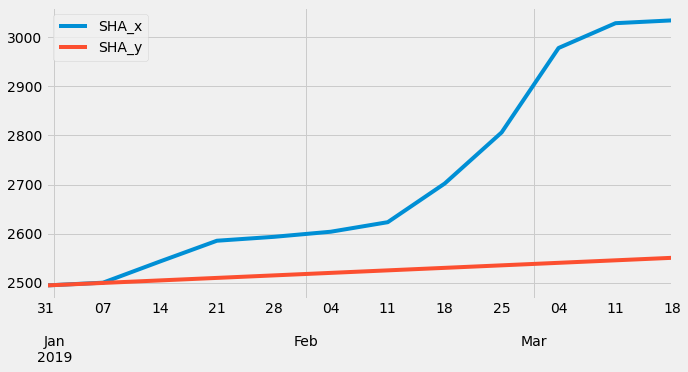

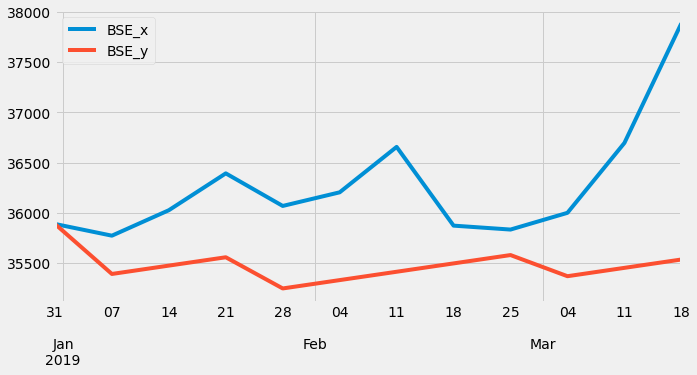

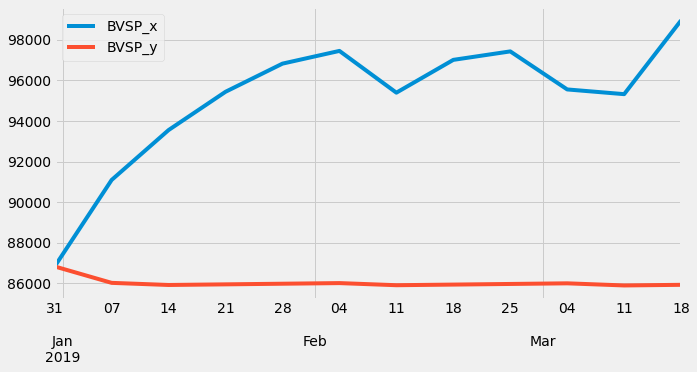

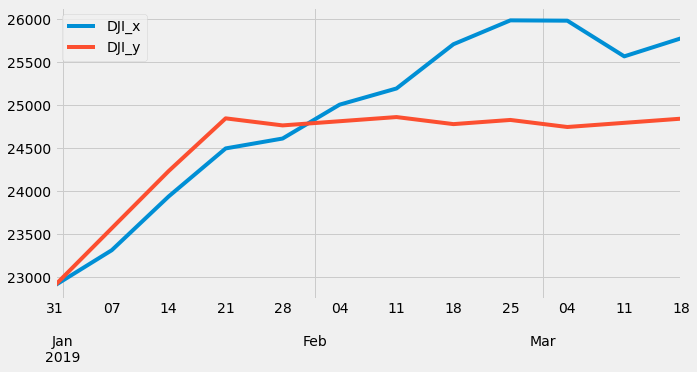

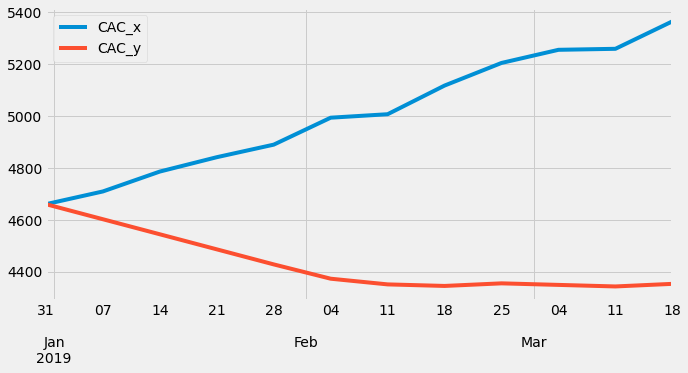

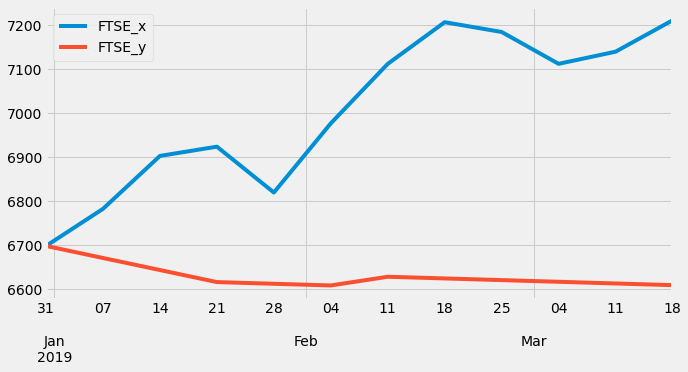

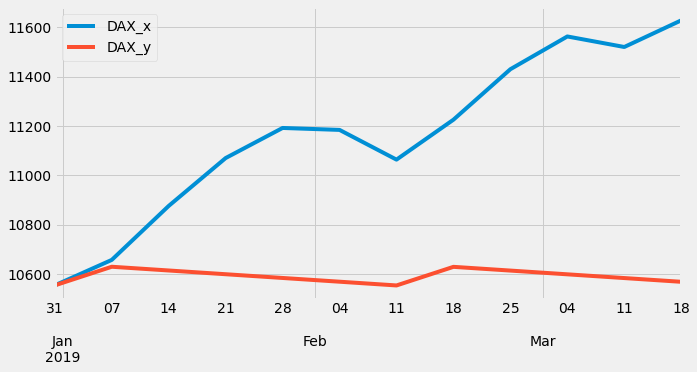

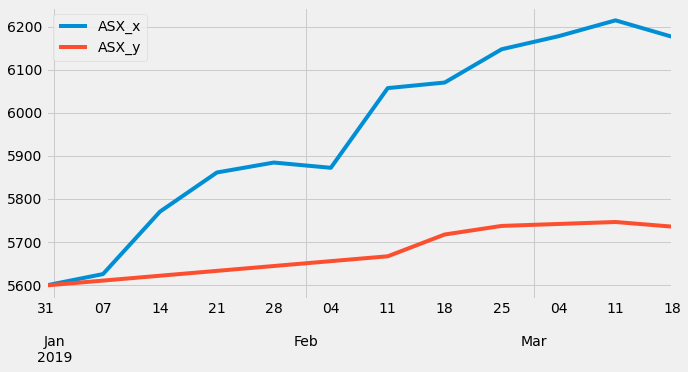

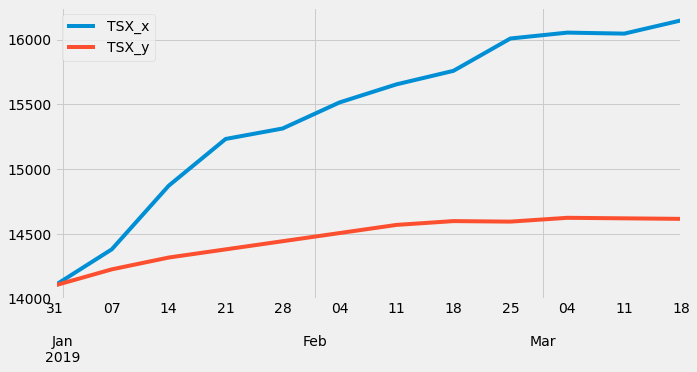

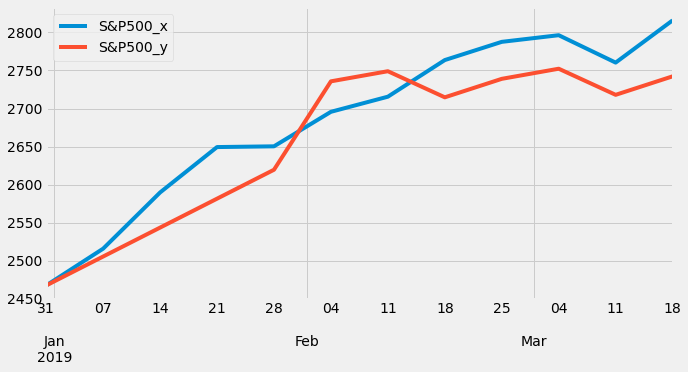

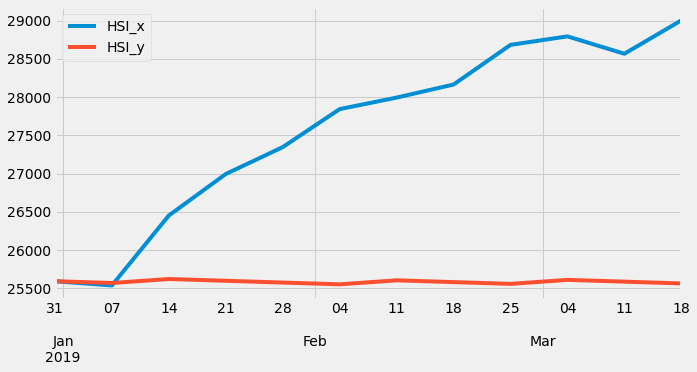

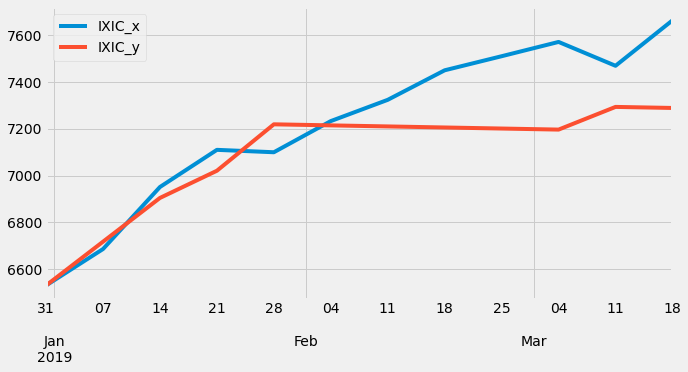

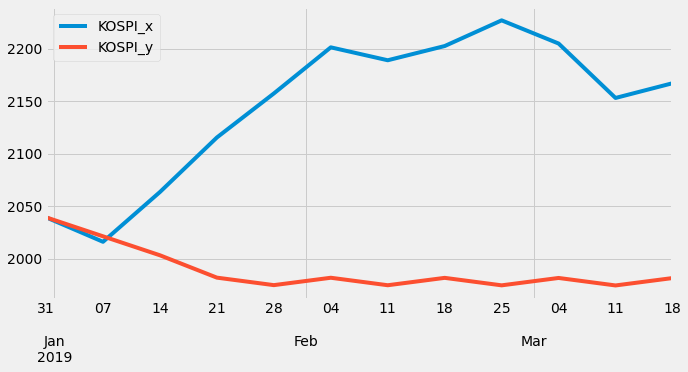

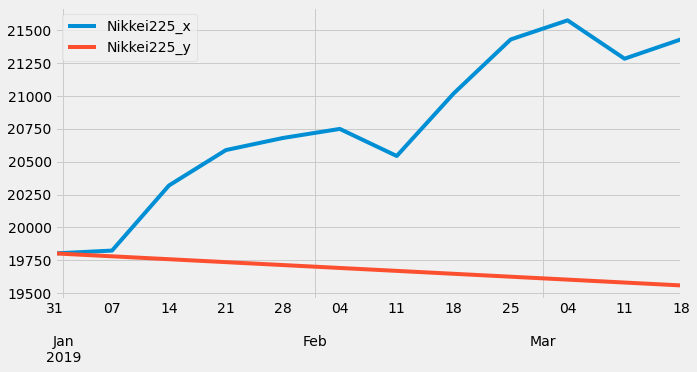

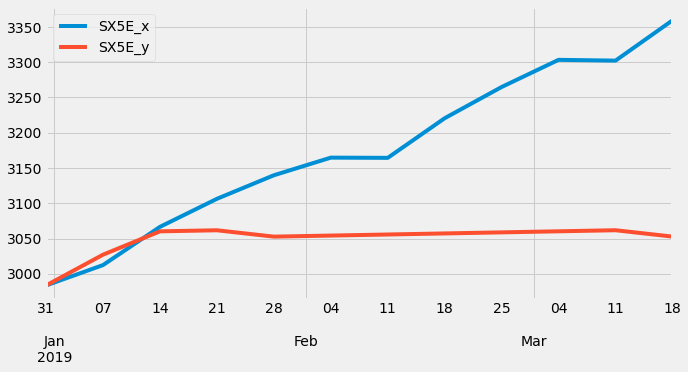

In [24]:
for i in range(2, len(col_names)):
  _ = pd.merge(true_df[col_names[i]], final_df[col_names[i]], how = 'left', left_index = True, right_index=True)
  _ = _.plot(figsize=(10, 5))

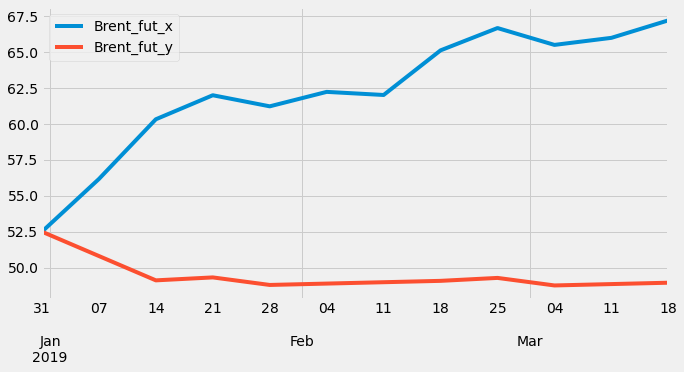

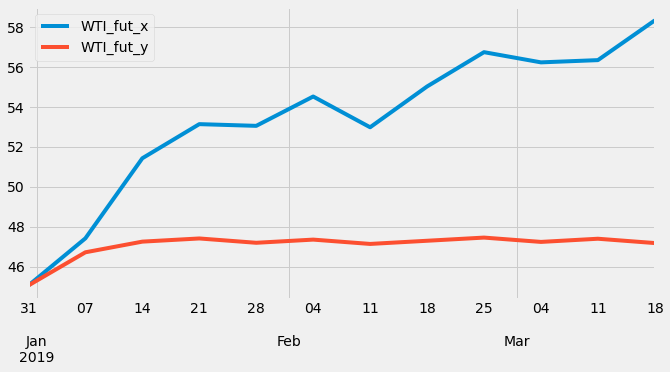

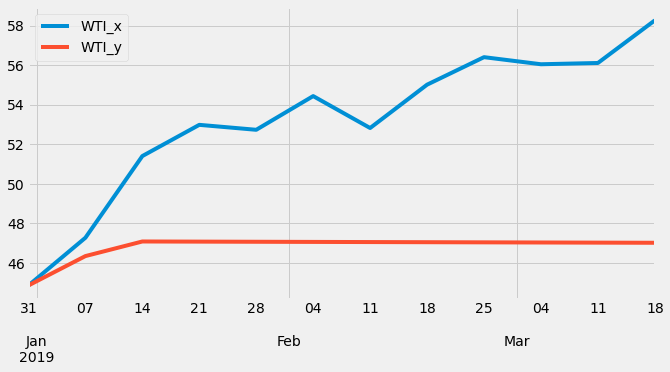

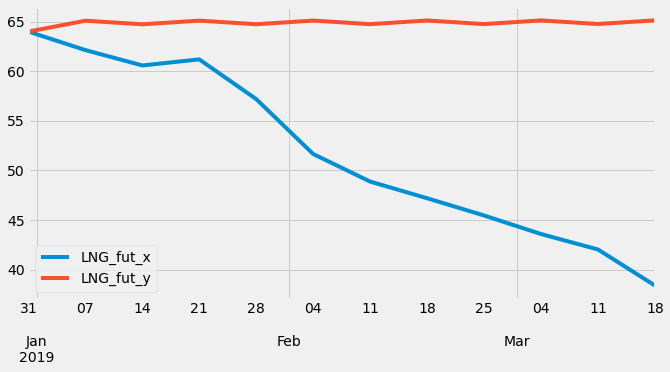

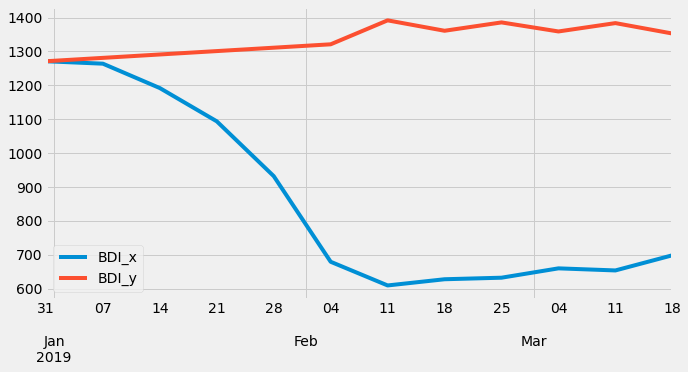

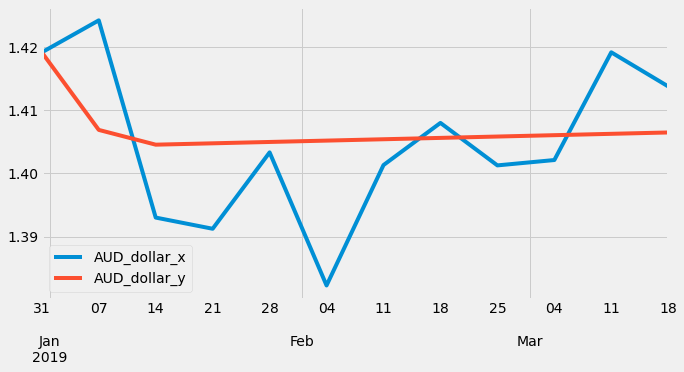

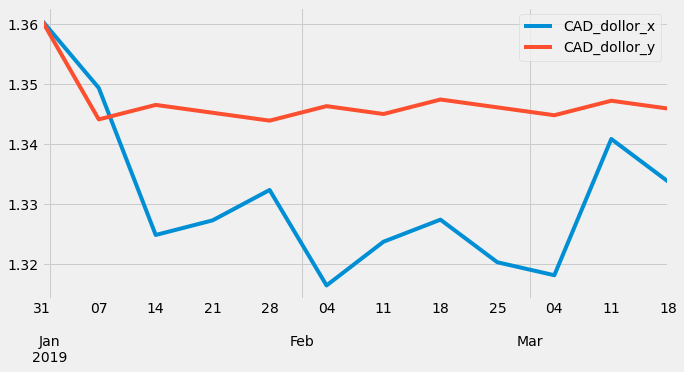

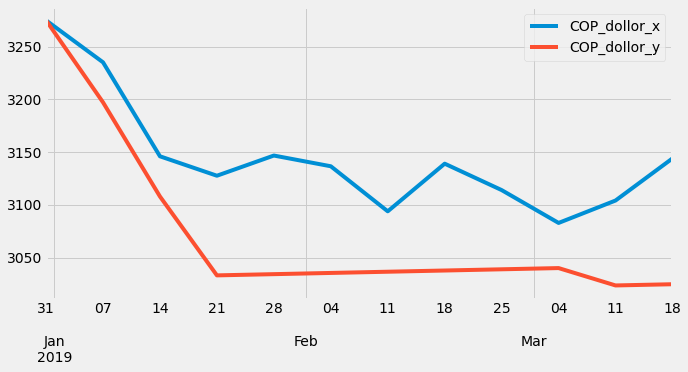

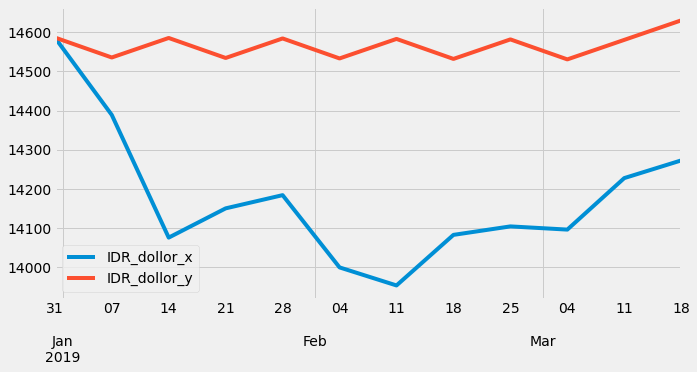

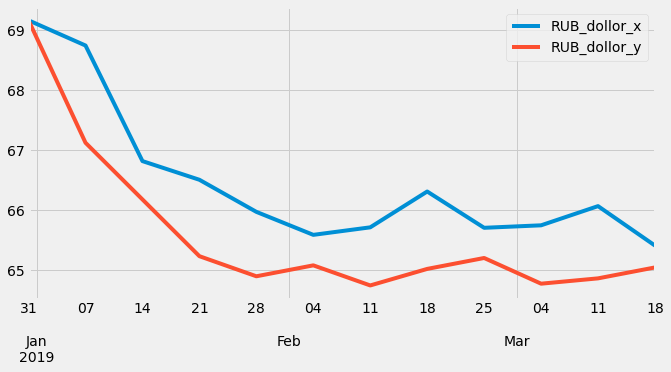

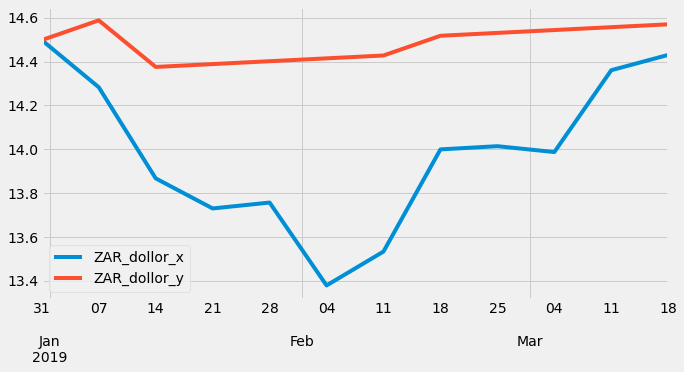

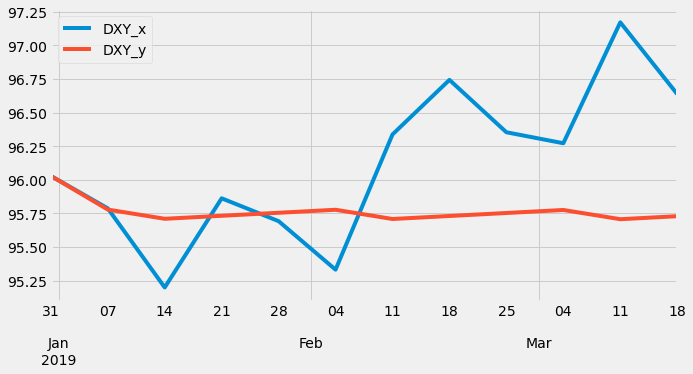

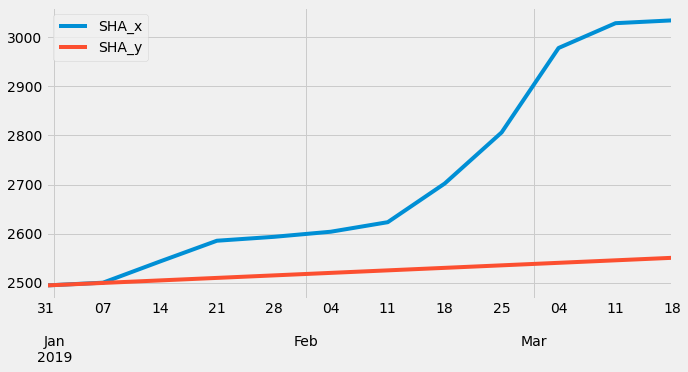

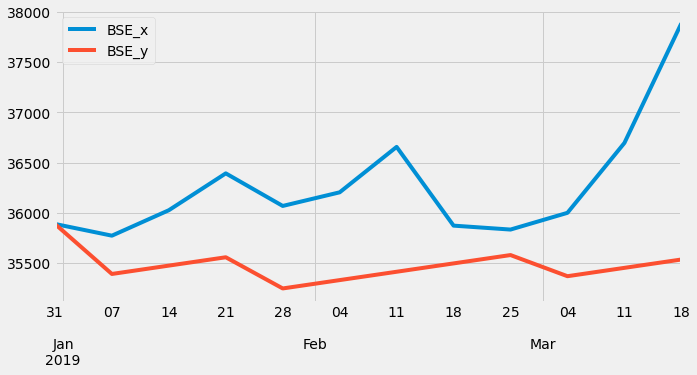

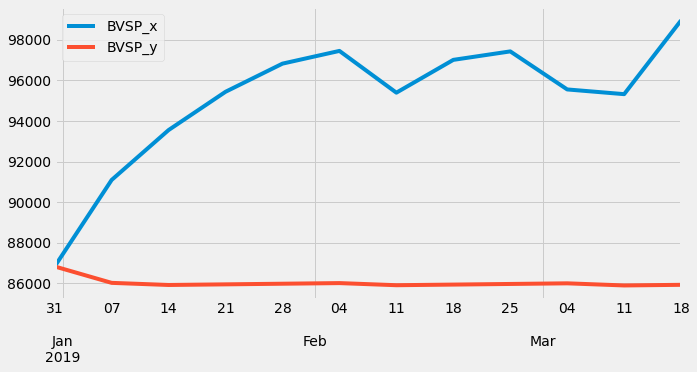

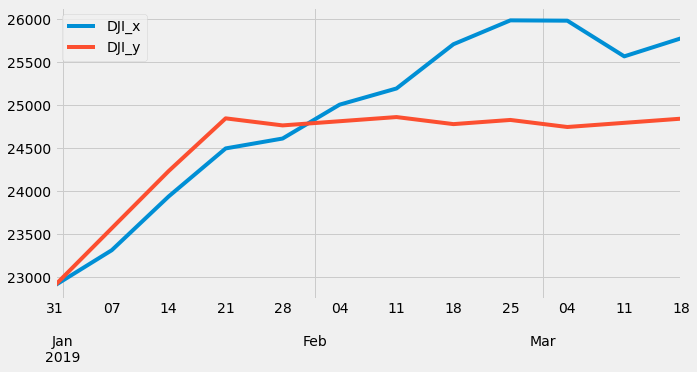

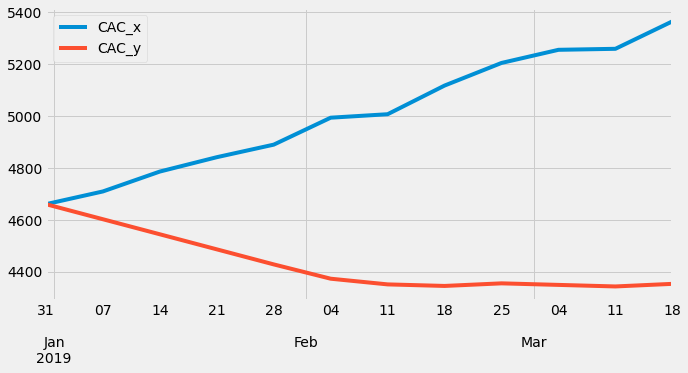

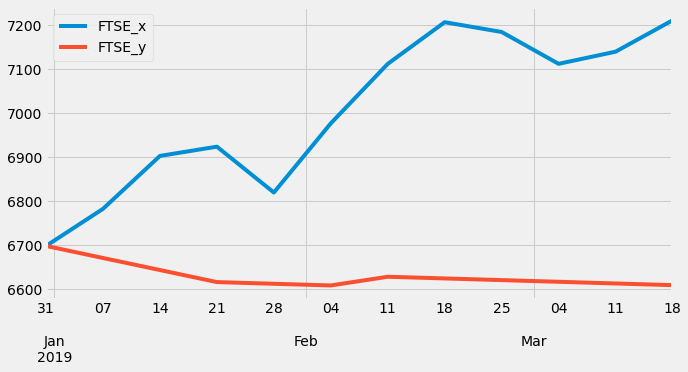

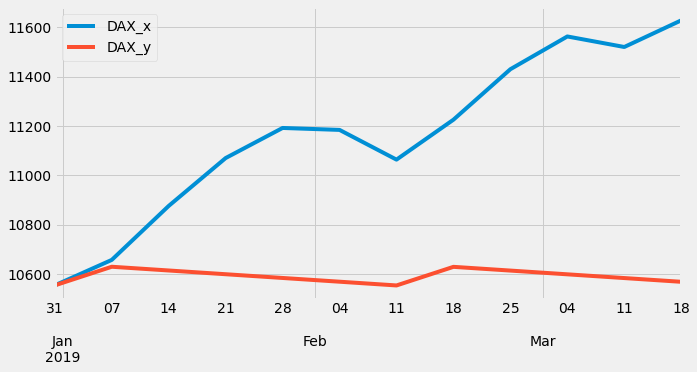

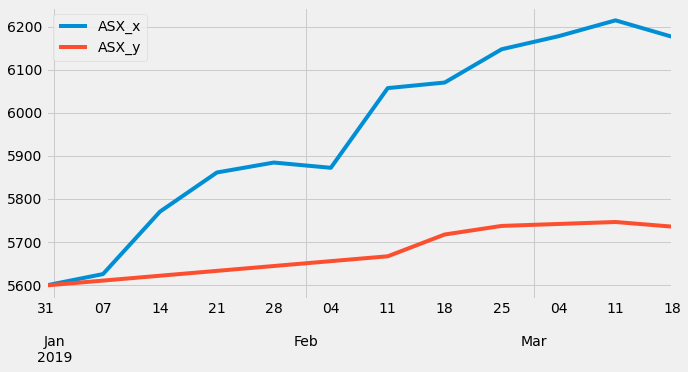

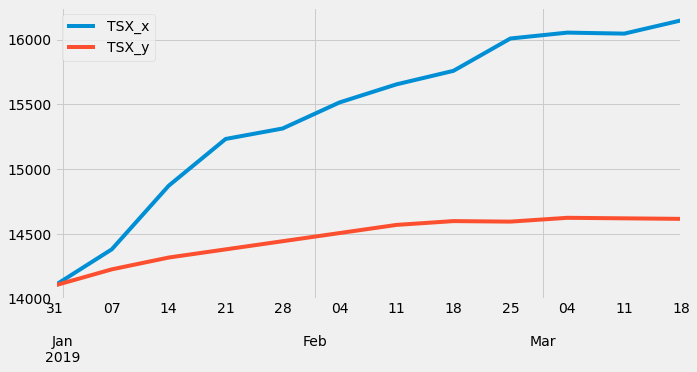

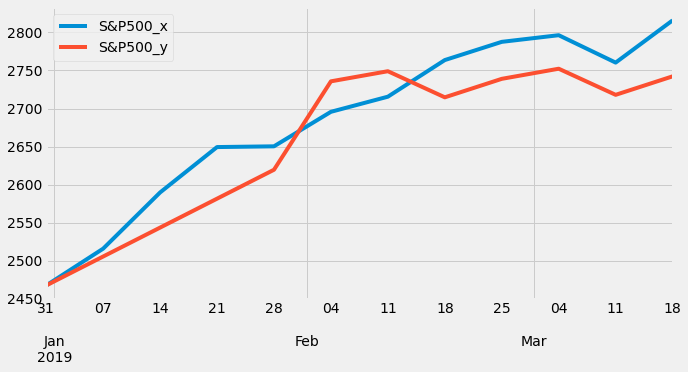

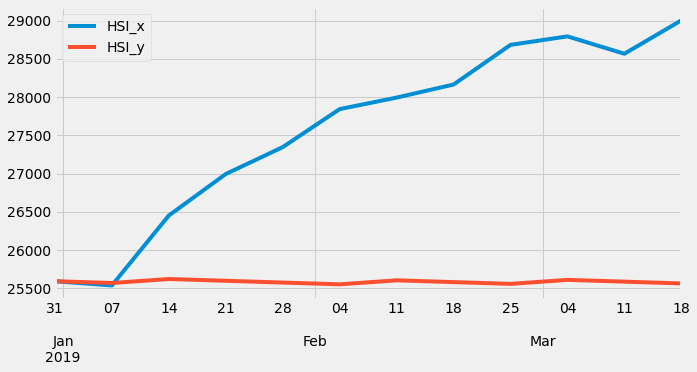

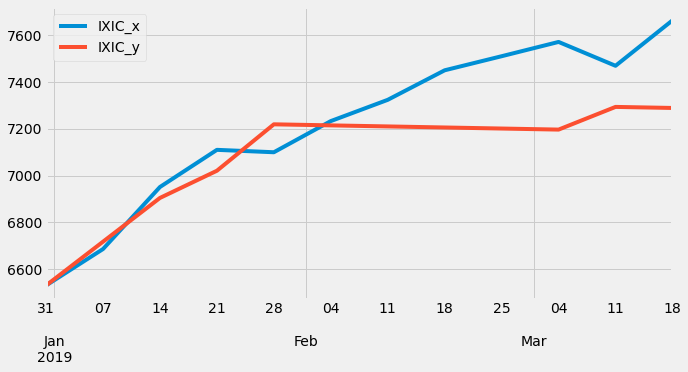

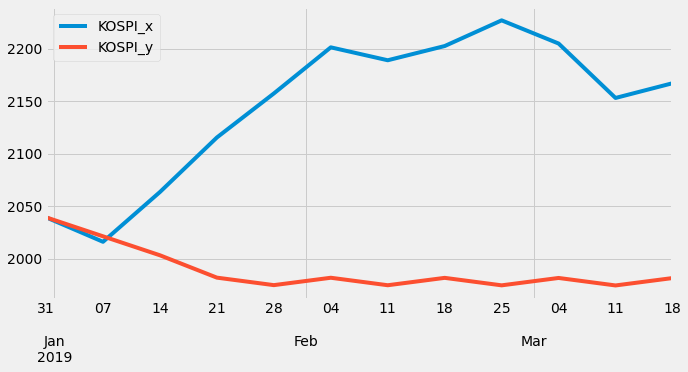

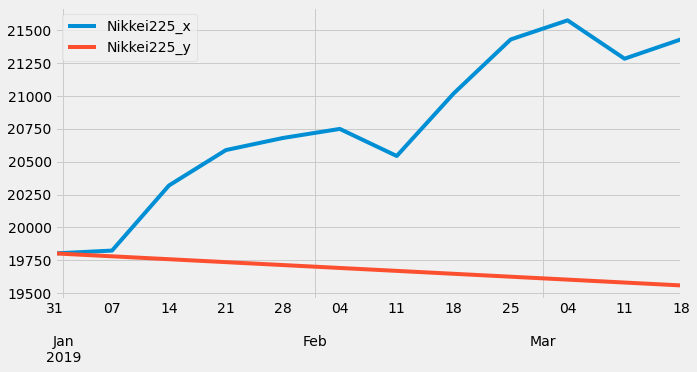

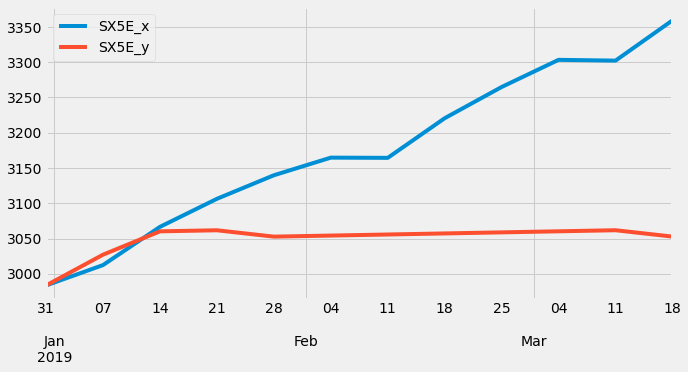

In [26]:


for i in range(2, len(col_names)):
  _ = pd.merge(true_df[col_names[i]], final_df[col_names[i]], how = 'left', left_index = True, right_index=True)
  _ = _.plot(figsize=(10, 5))

In [97]:
_

,Coal,Brent_fut,WTI_fut,WTI,LNG_fut,BDI,AUD_dollar,CAD_dollor,COP_dollor,IDR_dollor,...,FTSE,DAX,ASX,TSX,S&P500,HSI,IXIC,KOSPI,Nikkei225,SX5E
2011-01-03,127.266667,94.780000,91.436667,91.453333,61.070000,1773.000000,0.982650,0.997300,1907.333333,8927.316732,...,5899.899902,6939.373372,4745.200195,13443.200195,1262.383341,23168.983073,2665.753418,2057.360026,10228.919922,2817.836670
2011-01-10,135.600000,94.177143,88.771429,88.932857,56.531429,1558.571429,1.000303,0.995741,1875.142857,8990.678571,...,5998.071289,6942.448521,4715.671387,13310.285575,1272.122855,23685.679129,2701.521380,2083.529994,10496.112723,2814.252825
2011-01-17,136.578571,98.180000,91.504286,91.540000,55.690000,1446.714286,1.006029,0.988957,1851.471418,9011.185826,...,6011.514369,7055.802874,4771.100098,13442.171177,1288.165702,24161.655971,2744.378627,2099.587123,10516.174247,2894.737130
2011-01-24,132.228571,97.421429,89.471429,89.554286,55.398571,1384.428571,1.009414,0.994096,1820.064314,8963.307199,...,5933.399902,7072.215681,4781.885812,13350.414062,1285.441424,24001.379464,2711.667201,2087.249930,10383.151228,2955.362898
2011-01-31,129.350000,98.545714,88.481429,88.532857,54.164286,1175.714286,1.007243,0.996093,1833.985700,9003.357143,...,5908.442871,7103.974191,4785.757045,13428.628348,1286.069999,23672.869699,2710.682826,2100.782889,10380.559989,2961.618513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-28,NaN,49.266603,47.299629,47.280861,64.722406,1391.134794,1.405350,1.345122,3033.866235,14542.923340,...,6616.939012,10573.612062,5731.116555,14605.720991,2740.364430,25551.211266,7268.316765,1981.495530,19572.844804,3062.469387
2019-03-29,NaN,49.024621,47.161382,47.119967,65.192150,1353.374541,1.405746,1.346534,3036.548291,14564.430765,...,6613.022318,10610.233167,5738.343823,14614.721491,2747.497619,25580.188225,7296.658530,1974.412680,19569.680329,3058.174283
2019-03-30,NaN,48.892592,47.398698,46.959072,64.931979,1375.027172,1.406142,1.344213,3039.230347,14585.938190,...,6609.105625,10556.356481,5745.571090,14623.721992,2696.016628,25609.165184,7223.549704,1981.481351,19566.515854,3053.879180
2019-03-31,NaN,48.760562,47.260451,47.171167,64.671808,1396.679804,1.406538,1.345625,3024.290518,14607.445616,...,6628.786841,10592.977586,5737.449824,14599.180677,2714.142774,25562.812611,7251.891468,1974.398501,19563.351379,3060.110001


In [28]:
final_df.to_csv("/content/gdrive/MyDrive/XGB_week_pred.csv",encoding = 'utf-8-sig')

# **3.Graph**


In [85]:
df = pd.read_excel("/content/gdrive/My Drive/Black_coal/data/dataset/project_dataset.xlsx")
df = df.sort_values('date')
df['ds']= pd.to_datetime(df['date'])

df = df.set_index('ds')
df = df[df.index < '2019-04-01']
df_true= df[df.index>='2019-01-01']
df = df.resample('W-MON').mean()
df_true = df_true.resample('W-MON').mean() #월요일 기준으로 평균값 df
df = df.reset_index()
df

,ds,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,bdi,USD/AUD(호주),...,영국지수,독일지수,S&P500지수,항셍지수,나스닥지수,코스피지수,니케이225지수,유로스톡스50지수,호주지수,캐나다지수
0,2011-01-03,127.266667,168.866667,94.780000,9644.000000,91.436667,91.453333,61.070000,1773.000000,0.982650,...,5899.899902,6939.373372,1262.383341,23168.983073,2665.753418,2057.360026,10228.919922,2817.836670,4745.200195,13443.200195
1,2011-01-10,135.600000,173.442857,94.177143,9476.964286,88.771429,88.932857,56.531429,1558.571429,1.000303,...,5998.071289,6942.448521,1272.122855,23685.679129,2701.521380,2083.529994,10496.112723,2814.252825,4715.671387,13310.285575
2,2011-01-17,136.578571,177.857143,98.180000,9639.821429,91.504286,91.540000,55.690000,1446.714286,1.006029,...,6011.514369,7055.802874,1288.165702,24161.655971,2744.378627,2099.587123,10516.174247,2894.737130,4771.100098,13442.171177
3,2011-01-24,132.228571,178.500000,97.421429,9514.857143,89.471429,89.554286,55.398571,1384.428571,1.009414,...,5933.399902,7072.215681,1285.441424,24001.379464,2711.667201,2087.249930,10383.151228,2955.362898,4781.885812,13350.414062
4,2011-01-31,129.350000,179.371429,98.545714,9497.071429,88.481429,88.532857,54.164286,1175.714286,1.007243,...,5908.442871,7103.974191,1286.069999,23672.869699,2710.682826,2100.782889,10380.559989,2961.618513,4785.757045,13428.628348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2019-03-04,96.414286,86.551429,65.501429,6458.821429,56.235714,56.052857,43.587143,659.857143,1.402134,...,7112.500140,11563.065569,2796.378523,28794.111328,7571.422782,2204.829973,21574.452567,3303.395787,6177.600028,16054.885603
427,2019-03-11,96.328571,85.577143,65.992857,6426.357143,56.348571,56.117143,42.027143,653.714286,1.419207,...,7140.071359,11520.452846,2760.362863,28566.744141,7469.460031,2153.005720,21282.981585,3302.278599,6214.342773,16047.128627
428,2019-03-18,94.214286,85.848571,67.210000,6435.142857,58.341429,58.272857,38.398571,698.428571,1.413800,...,7211.414272,11628.311523,2815.899972,29003.642578,7663.631348,2167.012870,21431.142578,3359.372872,6175.957241,16149.557338
429,2019-03-25,93.421429,85.825714,67.467143,6385.892857,59.254286,59.031429,36.681429,696.428571,1.407571,...,7252.957171,11483.059989,2816.024275,29103.176897,7693.918597,2177.901437,21520.545480,3338.064244,6175.585798,16133.442662


## Prophet -19.01~03(xfeature)

In [91]:
def prophetm(df, z, x, y) :
  
        #a = prophetm(z, x, y) 
        df1 = df[['ds', z]]
      
    
        df1.columns = ['ds', 'y']
        df1['ds']= pd.to_datetime(df1['ds'])
        
        # df1=df1.set_index('ds')
        train = df1.drop(df.index[x:])
        y_true = df1['y'][y:].values 
        
      
        last_1year = pd.DataFrame(df_true.index)
        last_1year['ds']= pd.to_datetime(last_1year['ds'])
        m = Prophet(
        # trend
                changepoint_prior_scale=0.05,
        # seasonality
                weekly_seasonality=10,
                yearly_seasonality=20,
              daily_seasonality=False,)
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        forecast = m.fit(train).predict(last_1year)
        # fig = m.plot_components(forecast)
        # a = add_changepoints_to_plot(fig.gca(), m, forecast)
        y_pred = forecast['yhat'].values
       
        return y_pred, last_1year['ds'], y_true
      
# z = str(input('컬럼명 입력(''제외 입력): '))
# x = int(input('삭제할 주 단위를 입력해주세요(-붙여서): '))
# y = int(input('필요한 y값의 월 단위를 입력해주세요(-붙여서): '))




# print('-------------done------------')
# print('y_pred result: {} '  .format(y_pred))


In [92]:
def maker(a):
    y_tt = prophetm(df, a, -13, -13)
    y_tt = pd.DataFrame(y_tt)
    y_tt = y_tt.T
    y_tr = y_tt[[1,2]]
    y_tr = y_tr.rename(columns ={2:'y_true',1:'ds'})
    y_tt = y_tt[[1,0]]
    y_tt = y_tt.rename(columns ={0:'y_pred',1:'ds'})
    # print(y_tt)
    # print(y_true)

    # 예측하고 비교하기
    # 여기에서는 MAE를 살펴본다.

    y_pred = y_tt['y_pred'].values
    y_true = y_tr['y_true'].values
    from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    plt.figure(figsize=(10,5))
    print('MAE: %.3f' % mae)
    print('MAPE: %.3f' % mape)
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.legend()
    
    plt.show()

In [93]:
df.columns

Index(['ds', 'Coal_price', 'iron', 'Brent_fut', 'copper_fut', 'WTI_fut', 'WTI',
       'LNG_fut', 'bdi', 'USD/AUD(호주)', 'USD/CAD(캐나다)', 'USD/COP(콜롬비아)',
       'US 달러지수', 'USD/IDR(인도네시아)', 'USD/RUB(러시아)', 'USD/ZAR(자메이카)', '상하이종합지수',
       '인도지수', '브라질지수', '다우존스지수', '프랑스지수', '영국지수', '독일지수', 'S&P500지수', '항셍지수',
       '나스닥지수', '코스피지수', '니케이225지수', '유로스톡스50지수', '호주지수', '캐나다지수'],
      dtype='object')

In [94]:
df.iloc[:,2].name

'iron'

MAE: 6.900
MAPE: 0.080


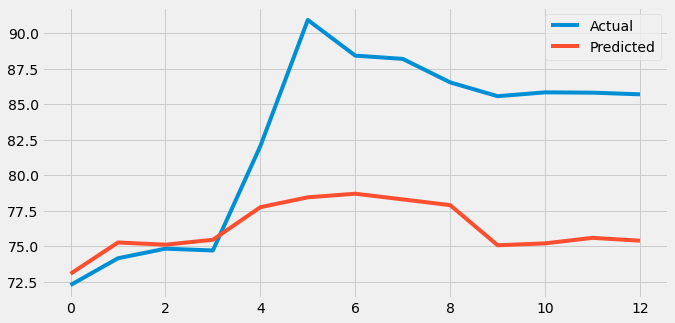

iron
MAE: 11.654
MAPE: 0.184


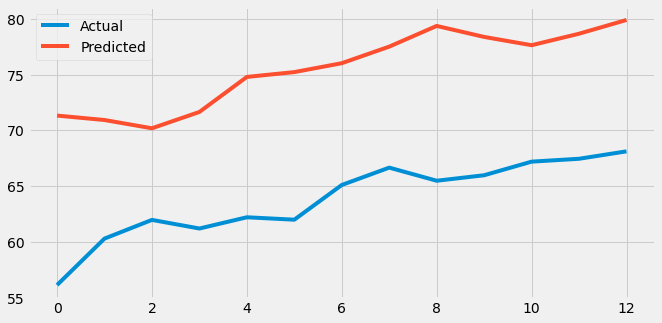

Brent_fut
MAE: 745.512
MAPE: 0.121


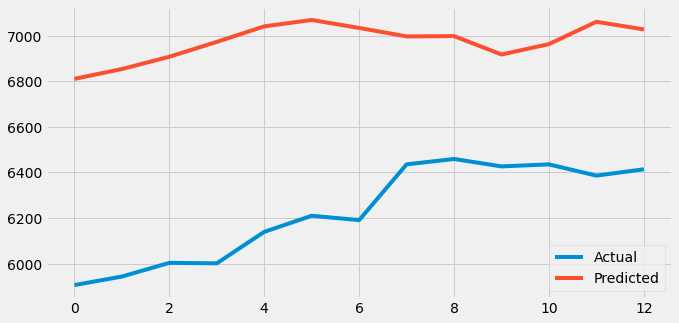

copper_fut
MAE: 12.664
MAPE: 0.233


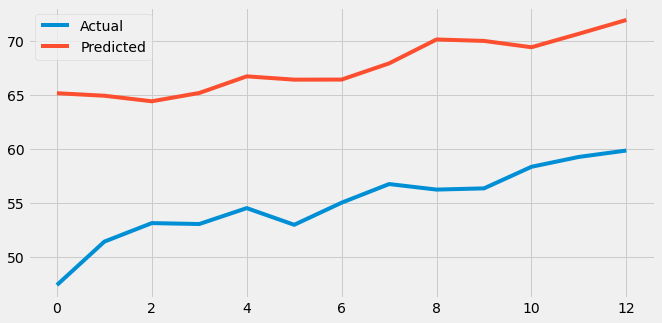

WTI_fut
MAE: 13.000
MAPE: 0.240


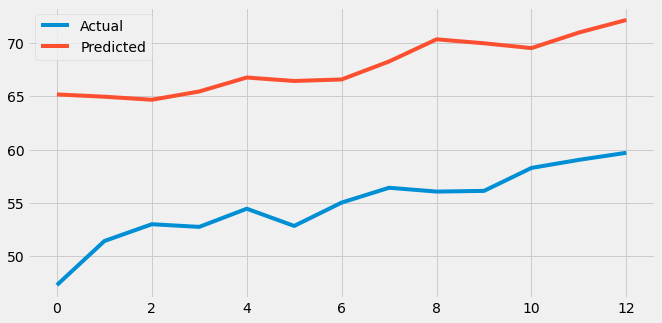

WTI
MAE: 18.675
MAPE: 0.435


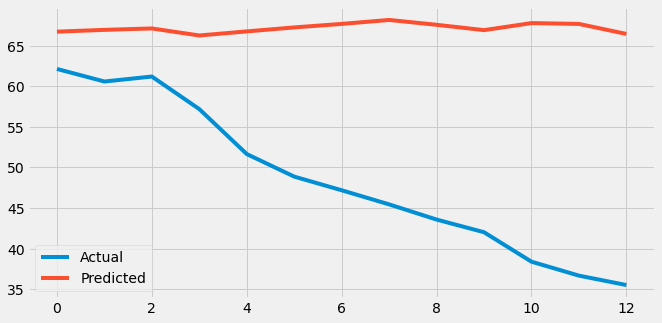

LNG_fut
MAE: 524.451
MAPE: 0.748


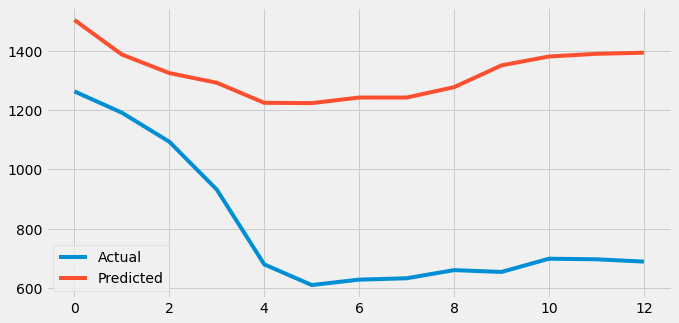

bdi
MAE: 0.031
MAPE: 0.022


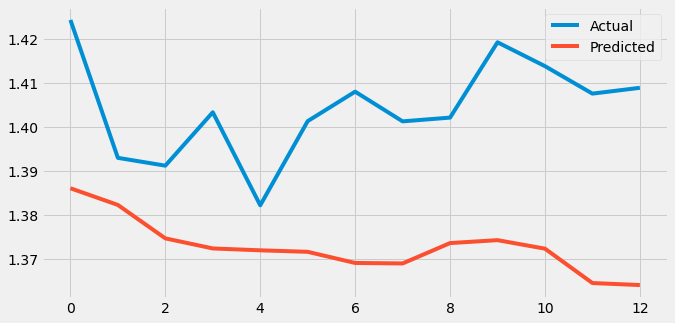

USD/AUD(호주)
MAE: 0.021
MAPE: 0.016


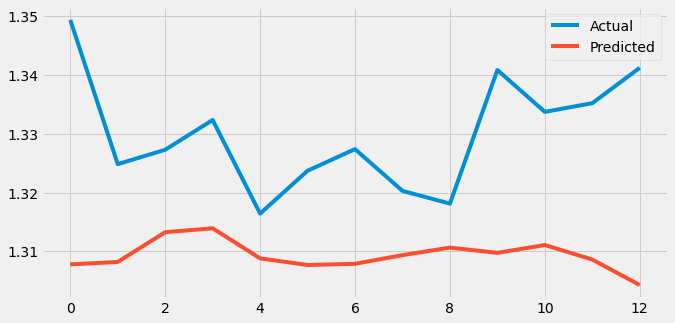

USD/CAD(캐나다)
MAE: 140.714
MAPE: 0.045


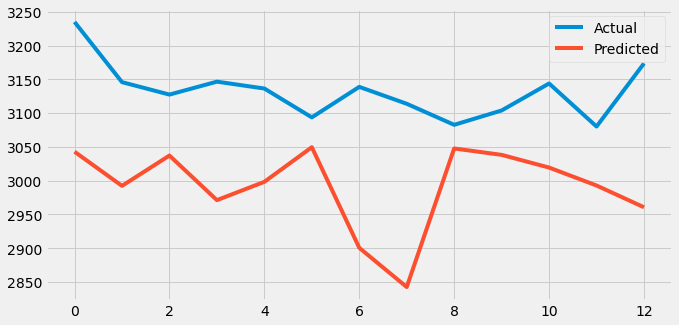

USD/COP(콜롬비아)
MAE: 3.318
MAPE: 0.034


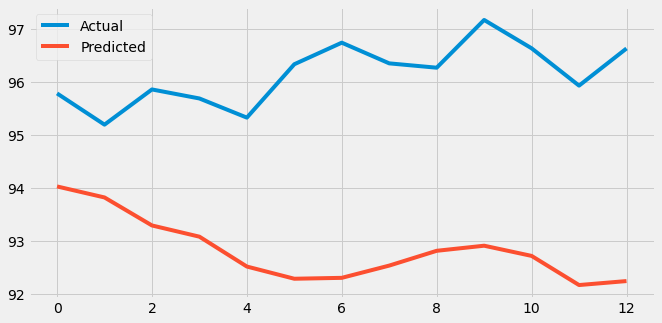

US 달러지수
MAE: 732.821
MAPE: 0.052


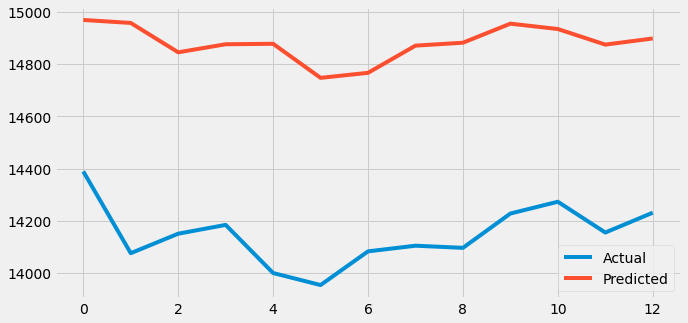

USD/IDR(인도네시아)
MAE: 1.826
MAPE: 0.028


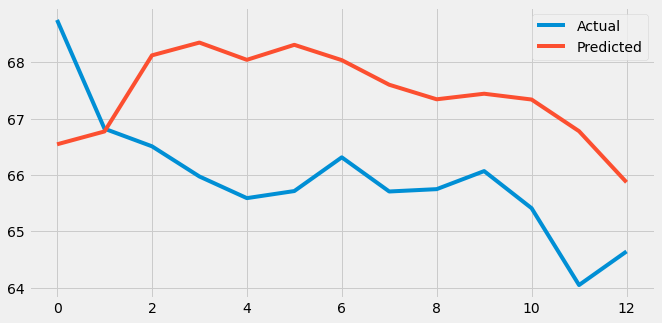

USD/RUB(러시아)
MAE: 0.476
MAPE: 0.034


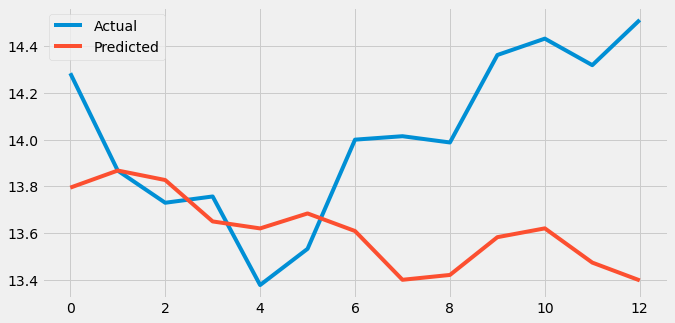

USD/ZAR(자메이카)
MAE: 219.807
MAPE: 0.083


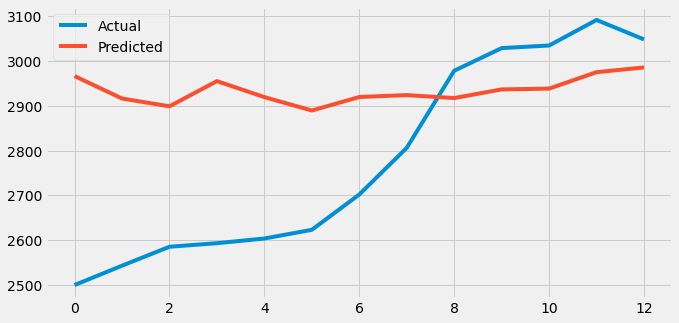

상하이종합지수
MAE: 1396.827
MAPE: 0.039


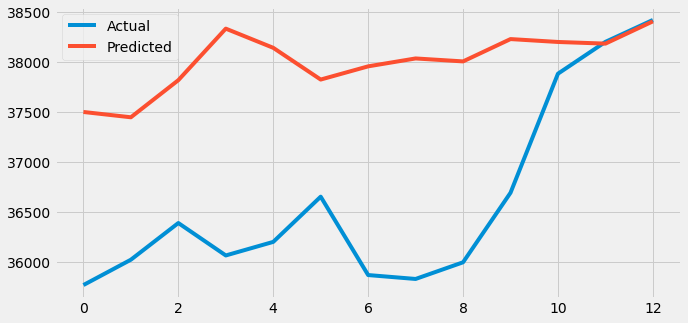

인도지수
MAE: 4408.498
MAPE: 0.046


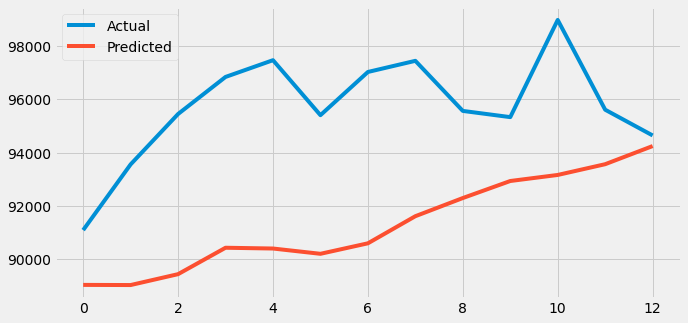

브라질지수
MAE: 2015.192
MAPE: 0.081


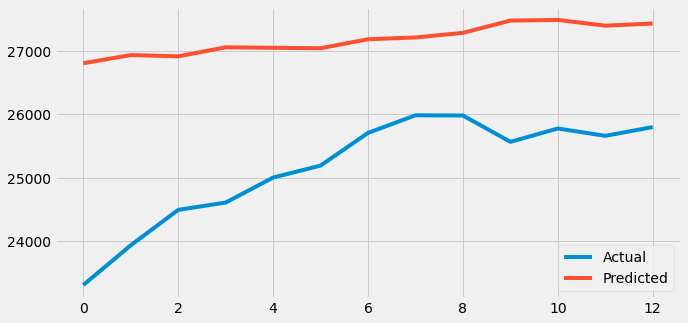

다우존스지수
MAE: 357.998
MAPE: 0.072


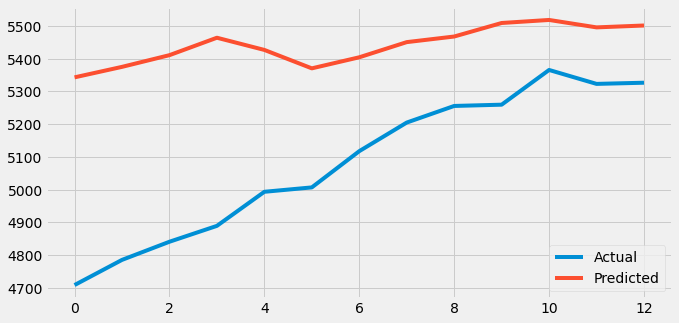

프랑스지수
MAE: 307.147
MAPE: 0.044


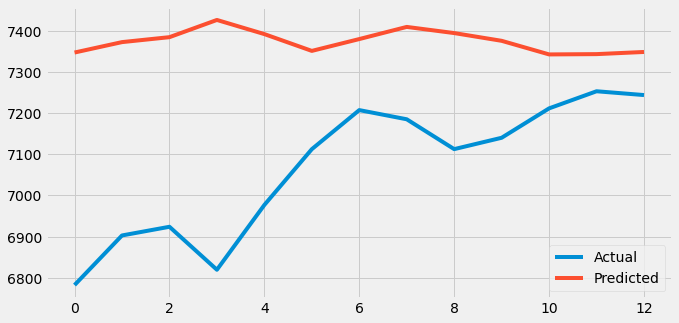

영국지수
MAE: 1099.761
MAPE: 0.098


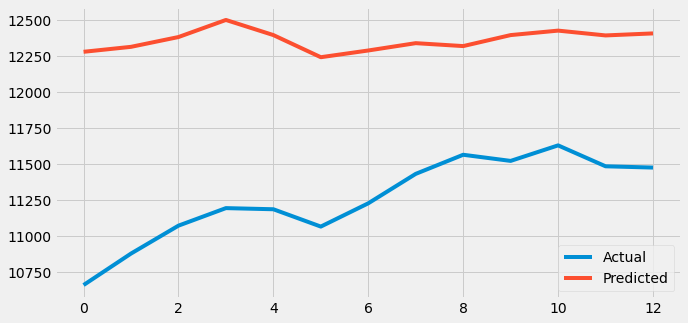

독일지수
MAE: 205.144
MAPE: 0.076


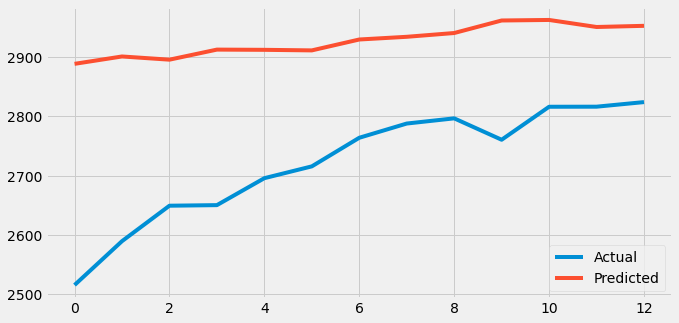

S&P500지수
MAE: 3060.328
MAPE: 0.111


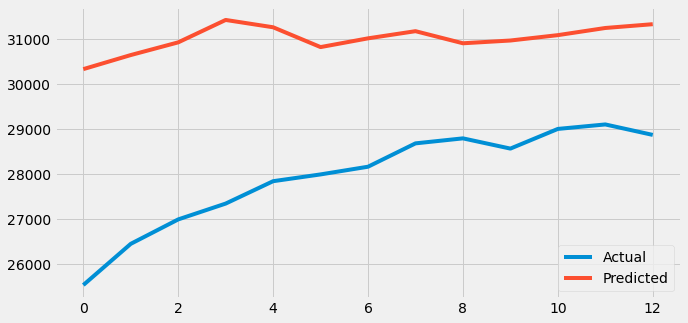

항셍지수
MAE: 781.769
MAPE: 0.108


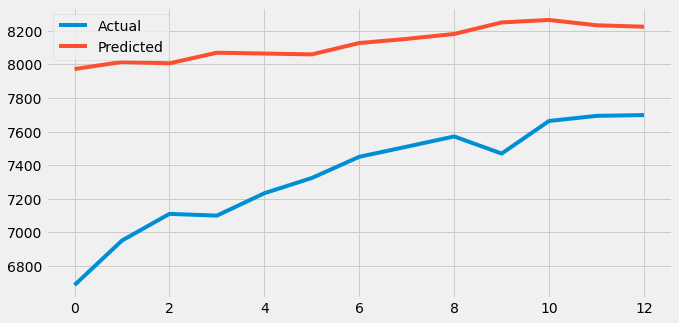

나스닥지수
MAE: 176.402
MAPE: 0.083


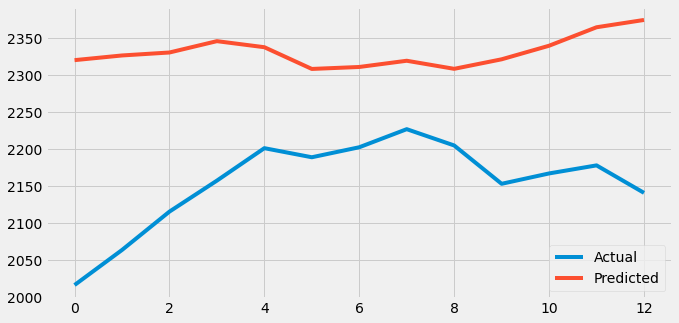

코스피지수
MAE: 3258.884
MAPE: 0.156


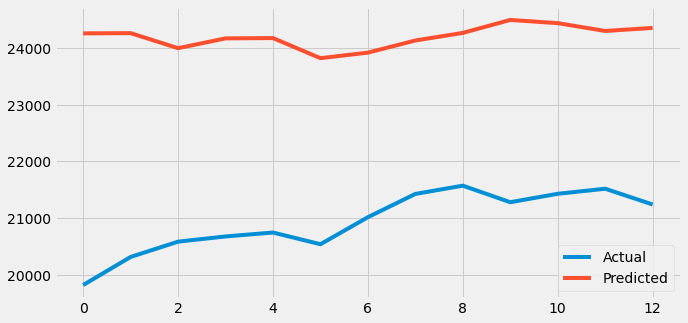

니케이225지수
MAE: 187.055
MAPE: 0.059


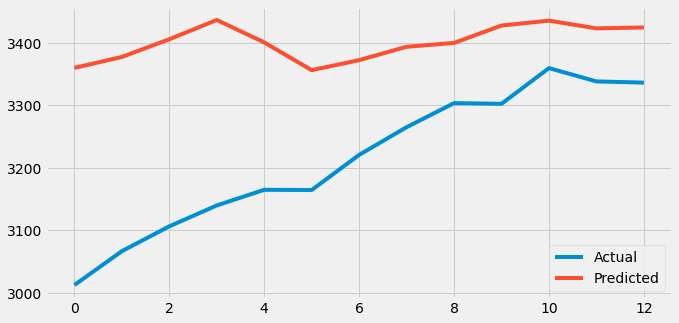

유로스톡스50지수
MAE: 168.456
MAPE: 0.029


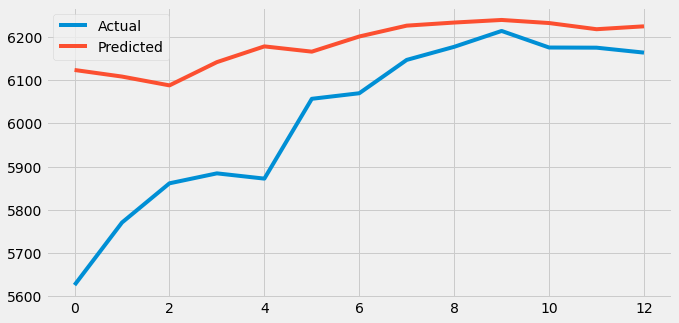

호주지수
MAE: 360.898
MAPE: 0.024


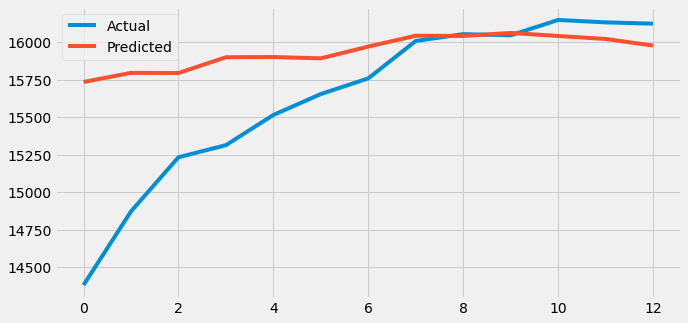

캐나다지수
---------------------done---------------------


In [95]:
save_prophet=pd.DataFrame()
for i in range(2,31):
  maker(df.iloc[:,i].name)
  
  print(df.iloc[:,i].name)
print('---------------------done---------------------')

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/dataset/Xgb로 만들 X들/project_dataset.xlsx")

In [ ]:
def maker_2(a):
    y_tt = prophetm(df, a, -13, -13)
    y_tt = pd.DataFrame(y_tt)
    y_tt = y_tt.T
    y_tr = y_tt[[1,2]]
    y_tr = y_tr.rename(columns ={2:'y_true',1:'ds'})
    y_tt = y_tt[[1,0]]
    y_tt = y_tt.rename(columns ={0:'y_pred',1:'ds'})
    # print(y_tt)
    # print(y_true)

    # 예측하고 비교하기
    # 여기에서는 MAE를 살펴본다.

    y_pred = y_tt['y_pred'].values
    y_true = y_tr['y_true'].values
    from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    plt.figure(figsize=(10,5))
    print('MAE: %.3f' % mae)
    print('MAPE: %.3f' % mape)
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.legend()
    
    plt.show()

#4.Heatmap

In [ ]:
df_heat = df.set_index('ds')

In [ ]:
df

,ds,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,bdi,USD/AUD(호주),...,영국지수,독일지수,S&P500지수,항셍지수,나스닥지수,코스피지수,니케이225지수,유로스톡스50지수,호주지수,캐나다지수
0,2011-01-01,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
1,2011-01-02,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
2,2011-01-03,136.50,170.00,94.84,9644.00,91.55,91.56,61.07,1773.0,0.97901,...,5899.899902,6989.740234,1271.869995,23436.050781,2691.520020,2070.080078,10228.919922,2839.429932,4745.200195,13443.200195
3,2011-01-04,137.30,172.10,93.53,9619.25,89.38,89.23,58.32,1693.0,0.98337,...,6013.899902,6975.350098,1270.199951,23668.480469,2681.250000,2085.139893,10398.099609,2844.169922,4742.500000,13402.299805
4,2011-01-05,130.65,174.50,95.50,9586.00,90.30,90.38,56.40,1621.0,0.99285,...,6043.899902,6939.819824,1276.560059,23757.820312,2702.199951,2082.550049,10380.769531,2833.739990,4714.899902,13396.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,2019-03-27,93.50,85.72,67.83,6336.00,59.41,59.12,37.47,690.0,1.40115,...,7194.200195,11419.040039,2805.370117,28728.250000,7643.379883,2145.620117,21378.730469,3322.040039,6136.000000,16132.500000
3008,2019-03-28,92.95,85.64,67.82,6368.75,59.30,59.30,36.05,692.0,1.41153,...,7234.299805,11428.160156,2815.439941,28775.210938,7669.169922,2128.100098,21033.759766,3320.290039,6176.100098,16155.500000
3009,2019-03-29,92.75,85.70,68.39,6475.75,60.14,59.98,34.61,689.0,1.41180,...,7279.200195,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609
3010,2019-03-30,92.75,85.70,68.39,6475.75,60.14,59.98,34.61,689.0,1.41180,...,7279.200195,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609


In [ ]:

df= df[['Coal_price', 'iron', 'Brent_fut', 'WTI_fut', 'WTI', 
        'LNG_fut', 'bdi', 'USD/AUD(호주)', 'USD/CAD(캐나다)', 'USD/COP(콜롬비아)', 'USD/IDR(인도네시아)', 
        'USD/RUB(러시아)', 'USD/ZAR(자메이카)', 'US 달러지수', '상하이종합지수', '인도지수', '브라질지수', 
        '다우존스지수', '프랑스지수', '영국지수', '독일지수', '호주지수', '캐나다지수', 
        'S&P500지수', '항셍지수', '나스닥지수', '코스피지수', '니케이225지수', '유로스톡스50지수']]
df.columns = ['Coal', 'Iron', 'Brent_fut', 'WTI_fut', 'WTI', 
              'LNG_fut', 'BDI', 'AUD_dollar', 'CAD_dollor', 'COP_dollor', 'IDR_dollor', 
              'RUB_dollor', 'ZAR_dollor', 'DXY' , 'SHA', 'BSE', 'BVSP', 
              'DJI', 'CAC', 'FTSE', 'DAX', 'ASX', 'TSX', 
              'S&P500', 'HSI', 'IXIC', 'KOSPI', 'Nikkei225', 'SX5E']
df.head()

,Coal,Iron,Brent_fut,WTI_fut,WTI,LNG_fut,BDI,AUD_dollar,CAD_dollor,COP_dollor,...,FTSE,DAX,ASX,TSX,S&P500,HSI,IXIC,KOSPI,Nikkei225,SX5E
0,122.65,168.3,94.75,91.38,91.40,61.07,1773.0,0.98447,0.99960,1915.0,...,5899.899902,6914.189941,4745.200195,13443.200195,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039
1,122.65,168.3,94.75,91.38,91.40,61.07,1773.0,0.98447,0.99960,1915.0,...,5899.899902,6914.189941,4745.200195,13443.200195,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039
2,136.50,170.0,94.84,91.55,91.56,61.07,1773.0,0.97901,0.99270,1892.0,...,5899.899902,6989.740234,4745.200195,13443.200195,1271.869995,23436.050781,2691.520020,2070.080078,10228.919922,2839.429932
3,137.30,172.1,93.53,89.38,89.23,58.32,1693.0,0.98337,0.99239,1896.5,...,6013.899902,6975.350098,4742.500000,13402.299805,1270.199951,23668.480469,2681.250000,2085.139893,10398.099609,2844.169922
4,130.65,174.5,95.50,90.30,90.38,56.40,1621.0,0.99285,0.99700,1884.0,...,6043.899902,6939.819824,4714.899902,13396.000000,1276.560059,23757.820312,2702.199951,2082.550049,10380.769531,2833.739990


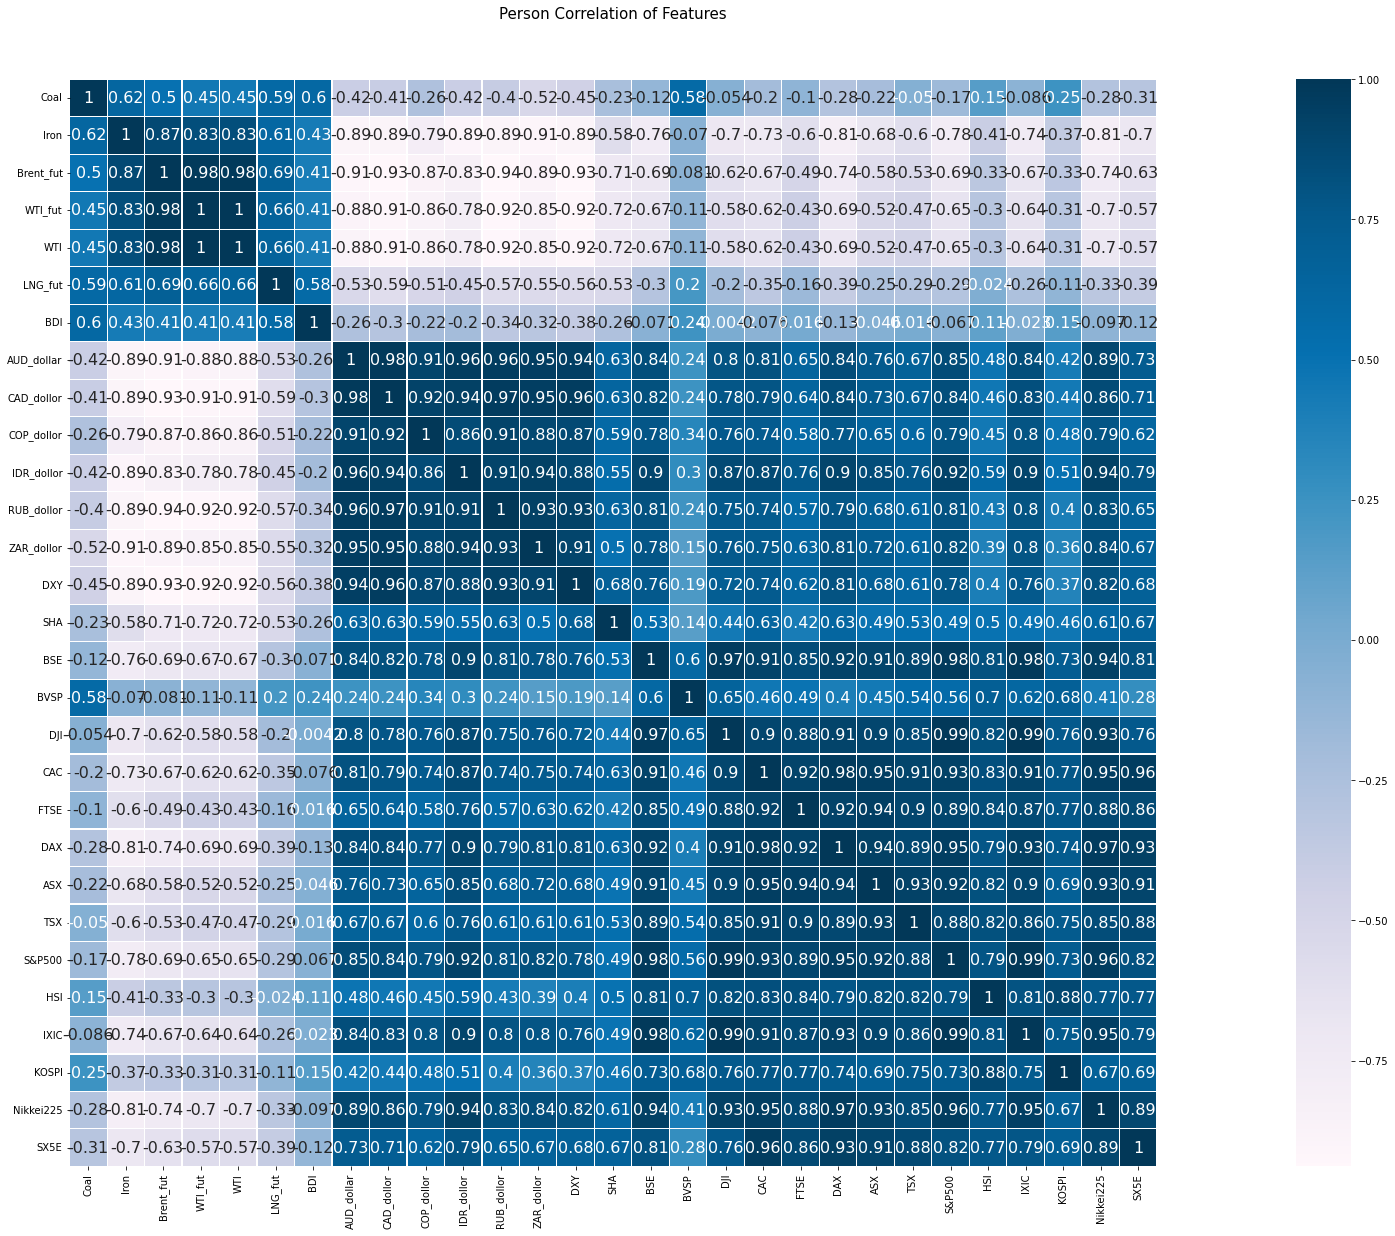

In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize=(50, 20))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})
